# 라이브러리 가져오기

In [2]:
import keras
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# 데이터 가져오기

In [4]:
####################################
correct_file_name = "Data_set"
####################################

#코렙에서 가져올때(경로를 확인해주자)#
row_data_frame = pd.read_csv("/content/gdrive/My Drive/EPD_TIME/"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
#쥬피터 노트북에서 가져올때(같은 파일에 있는지 혹인해주자)#
#row_data_frame = pd.read_csv("./"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)

In [5]:
row_data_frame

,label,0,1,2,3,4,5,6,7,8,...,591,592,593,594,595,596,597,598,599,600
0,397,0.652173,0.000000,0.250837,2.157190,0.752508,1.454849,1.404680,2.959866,17.357863,...,252.391258,251.137150,253.946515,247.826013,246.471594,249.782731,255.000000,249.030180,251.789389,248.478252
1,397,4.481351,2.732533,1.639518,3.060437,0.109300,3.606940,0.000000,6.667381,27.216024,...,249.862800,247.348884,245.053568,245.381444,255.000000,246.037288,249.207002,251.939516,252.048839,251.174442
2,397,0.000000,12.308934,6.359613,7.795650,5.128721,7.180204,8.411096,15.386163,34.875309,...,246.178604,234.895373,243.511666,247.409478,248.230061,248.640352,244.332249,247.204289,241.049831,245.152832
3,397,0.840203,5.881385,5.881385,10.922567,11.342660,0.000000,10.082364,10.502475,36.968716,...,240.716675,246.177967,232.734827,220.131872,239.876490,255.000000,236.515750,245.337782,223.492612,232.734827
4,397,2.805825,4.126215,0.000000,0.495145,3.135924,0.000000,3.631070,9.242720,35.155345,...,247.902914,251.038895,239.815552,239.980633,239.155368,245.592269,234.038834,241.961186,239.485460,244.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,376,7.874101,4.239900,3.028500,0.000000,2.624697,5.451301,7.066504,11.710207,38.764838,...,244.904970,246.923942,244.703030,239.251764,244.299236,244.703030,249.346794,234.204292,232.589029,241.876470
5432,376,2.252654,4.355128,5.256187,6.307421,1.651944,3.003539,0.000000,9.461135,37.694339,...,255.000000,245.088361,244.337457,245.538917,244.938155,244.187315,239.381670,242.235016,251.245608,242.385158
5433,376,0.000000,19.842712,9.288079,24.064572,28.286415,24.908930,16.465227,17.309603,37.996690,...,66.283087,86.547995,80.637401,69.660571,74.304611,63.749977,80.215204,84.437065,85.281441,84.437065
5434,376,8.761287,12.450259,9.683535,2.766724,1.383362,0.000000,11.989145,13.372507,19.828203,...,65.018079,56.717886,78.851720,62.712469,72.857137,69.168165,68.245917,69.629299,57.179020,65.479193


In [6]:
row_data_frame["label"][0] #가로: string 세로 int

397

In [7]:
inten_lst = []
for i in range(0, len(row_data_frame["label"])):
    inten_lst.append(row_data_frame[str(row_data_frame["label"][i])][i])

In [8]:
row_data_frame['label'] =inten_lst

In [9]:
row_data_frame

,label,0,1,2,3,4,5,6,7,8,...,591,592,593,594,595,596,597,598,599,600
0,161.287649,0.652173,0.000000,0.250837,2.157190,0.752508,1.454849,1.404680,2.959866,17.357863,...,252.391258,251.137150,253.946515,247.826013,246.471594,249.782731,255.000000,249.030180,251.789389,248.478252
1,175.647239,4.481351,2.732533,1.639518,3.060437,0.109300,3.606940,0.000000,6.667381,27.216024,...,249.862800,247.348884,245.053568,245.381444,255.000000,246.037288,249.207002,251.939516,252.048839,251.174442
2,194.275914,0.000000,12.308934,6.359613,7.795650,5.128721,7.180204,8.411096,15.386163,34.875309,...,246.178604,234.895373,243.511666,247.409478,248.230061,248.640352,244.332249,247.204289,241.049831,245.152832
3,176.861715,0.840203,5.881385,5.881385,10.922567,11.342660,0.000000,10.082364,10.502475,36.968716,...,240.716675,246.177967,232.734827,220.131872,239.876490,255.000000,236.515750,245.337782,223.492612,232.734827
4,193.271860,2.805825,4.126215,0.000000,0.495145,3.135924,0.000000,3.631070,9.242720,35.155345,...,247.902914,251.038895,239.815552,239.980633,239.155368,245.592269,234.038834,241.961186,239.485460,244.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,180.296849,7.874101,4.239900,3.028500,0.000000,2.624697,5.451301,7.066504,11.710207,38.764838,...,244.904970,246.923942,244.703030,239.251764,244.299236,244.703030,249.346794,234.204292,232.589029,241.876470
5432,175.256207,2.252654,4.355128,5.256187,6.307421,1.651944,3.003539,0.000000,9.461135,37.694339,...,255.000000,245.088361,244.337457,245.538917,244.938155,244.187315,239.381670,242.235016,251.245608,242.385158
5433,131.721797,0.000000,19.842712,9.288079,24.064572,28.286415,24.908930,16.465227,17.309603,37.996690,...,66.283087,86.547995,80.637401,69.660571,74.304611,63.749977,80.215204,84.437065,85.281441,84.437065
5434,127.269512,8.761287,12.450259,9.683535,2.766724,1.383362,0.000000,11.989145,13.372507,19.828203,...,65.018079,56.717886,78.851720,62.712469,72.857137,69.168165,68.245917,69.629299,57.179020,65.479193


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
te =list(row_data_frame.loc[1][1:])
te[0:5]

[4.481351084, 2.732533313, 1.63951812, 3.060436937, 0.109299651]

X 만들기

In [12]:
X = []
for i in range(0, len(row_data_frame.index)):
  X.append(list(row_data_frame.loc[i][1:]))

In [13]:
X[1][1:10]

[2.732533313,
 1.63951812,
 3.060436937,
 0.109299651,
 3.606939864,
 0.0,
 6.667381471,
 27.21602414,
 49.95072522]

Y 만들기

In [14]:
Y=[]
for i in range(0, len(row_data_frame.index)):
  Y.append([])
  Y[i].append(float(row_data_frame.loc[i]["label"]))

In [15]:
Y[1:3]

[[175.6472389], [194.2759141]]

In [17]:
x_train = torch.FloatTensor(X[100:])
y_train = torch.FloatTensor(Y[100:])
print(x_train.shape)
print(y_train.shape)

torch.Size([5336, 601])
torch.Size([5336, 1])


In [18]:
# 가중치와 편향 선언
W = torch.zeros((601, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [19]:
hypothesis = x_train.matmul(W) + b

In [21]:
import torch.optim as optim


# 모델 초기화
W = torch.zeros((601, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-8)

nb_epochs = 100000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))
x_test = torch.FloatTensor(X[:100])
y_test = torch.FloatTensor(Y[:100])
test_hypothesis = x_test.matmul(W) + b
score = torch.mean(abs(test_hypothesis - y_test))
print(score)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 95002/100000 hypothesis: tensor([176.9644,  96.9239, 164.5296,  ..., 140.9315, 134.5255, 141.9623]) Cost: 24.978317
Epoch 95003/100000 hypothesis: tensor([176.9644,  96.9239, 164.5296,  ..., 140.9315, 134.5255, 141.9623]) Cost: 24.978279
Epoch 95004/100000 hypothesis: tensor([176.9645,  96.9239, 164.5297,  ..., 140.9315, 134.5255, 141.9623]) Cost: 24.978241
Epoch 95005/100000 hypothesis: tensor([176.9645,  96.9239, 164.5297,  ..., 140.9315, 134.5255, 141.9623]) Cost: 24.978205
Epoch 95006/100000 hypothesis: tensor([176.9645,  96.9239, 164.5297,  ..., 140.9315, 134.5255, 141.9623]) Cost: 24.978165
Epoch 95007/100000 hypothesis: tensor([176.9645,  96.9239, 164.5297,  ..., 140.9315, 134.5255, 141.9623]) Cost: 24.978123
Epoch 95008/100000 hypothesis: tensor([176.9646,  96.9239, 164.5297,  ..., 140.9315, 134.5255, 141.9623]) Cost: 24.978088
Epoch 95009/100000 hypothesis: tensor([176.9646,  96.9239, 164.5298,  ..., 140.9315, 134.5255, 141.9623]) Cost

검증

In [118]:
def test_model(test_idx , chance):
  NUM = test_idx
  pivot = float((x_test[NUM]).matmul(W) + b)
  for idx in range(1,len(row_data_frame.loc[NUM][1:])):
    if float(row_data_frame.loc[NUM][idx]) > pivot:
      if chance == 0:
        print(idx)
        break
      else:
        chance -= 1

    else:
      continue

In [122]:
for i in range (40,50):
  test_model(i,14)

390
396
394
396
397
394
396
392
398
397


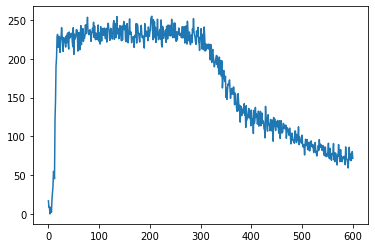

In [116]:
import matplotlib.pyplot as plt
plt.plot(x_test[34])